Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,537 (724.75 KB)

 Trainable params: 185,537 (724.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9829 - loss: 0.4793 - val_accuracy: 0.9921 - val_loss: 0.0505
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9948 - loss: 0.0274 - val_accuracy: 0.9982 - val_loss: 0.0045
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9979 - loss: 0.0052 - val_accuracy: 0.9987 - val_loss: 0.0031
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9985 - loss: 0.0034 - val_accuracy: 0.9988 - val_loss: 0.0029
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9988 - loss: 0.0030 - val_accuracy: 0.9989 - val_loss: 0.0027
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


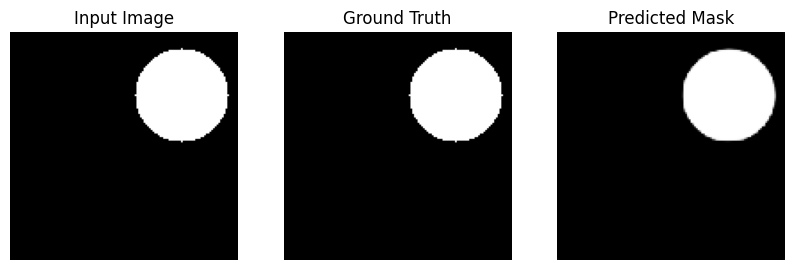

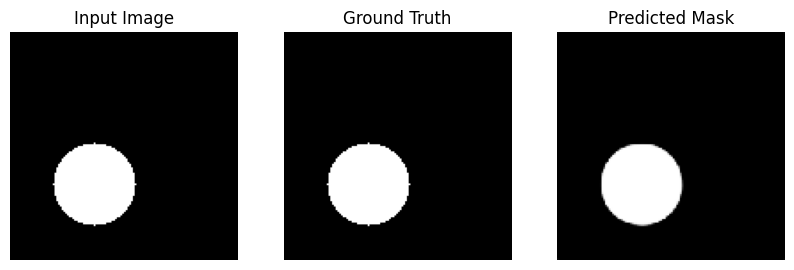

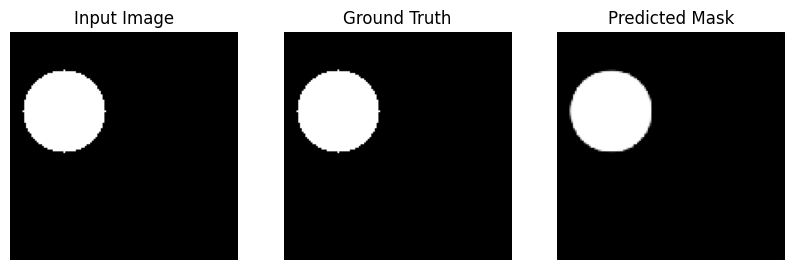

In [1]:

import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

IMG_SIZE = 128
NUM_SAMPLES = 200

# ----------------------------
# Generate Synthetic Dataset
# ----------------------------
def generate_data(num_samples):
    images = []
    masks = []

    for _ in range(num_samples):
        img = np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
        mask = np.zeros((IMG_SIZE, IMG_SIZE, 1), dtype=np.uint8)

        # Random circle
        center = (np.random.randint(30, 98), np.random.randint(30, 98))
        radius = np.random.randint(10, 30)
        color = (255, 255, 255)

        cv2.circle(img, center, radius, color, -1)
        cv2.circle(mask, center, radius, (255), -1)

        images.append(img / 255.0)
        masks.append(mask / 255.0)

    return np.array(images), np.array(masks)

X, y = generate_data(NUM_SAMPLES)

# ----------------------------
# Build CNN Model
# ----------------------------
def build_model():
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Encoder
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    # Bottleneck
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)

    # Decoder
    x = layers.UpSampling2D()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)

    x = layers.UpSampling2D()(x)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)

    return models.Model(inputs, outputs)

model = build_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# ----------------------------
# Train Model
# ----------------------------
model.fit(X, y, epochs=5, batch_size=8, validation_split=0.2)

# ----------------------------
# Test on New Synthetic Image
# ----------------------------
X_test, y_test = generate_data(3)

predictions = model.predict(X_test)

# ----------------------------
# Display Results
# ----------------------------
for i in range(3):
    plt.figure(figsize=(10,3))

    plt.subplot(1,3,1)
    plt.title("Input Image")
    plt.imshow(X_test[i])
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.title("Ground Truth")
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.axis("off")

    plt.show()